In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [2]:
#data compiled on December 4
calendar_Dec = pd.read_csv('../data/initial_data/2019Dec/calendar.csv.gz', compression='gzip', 
                                 header=0, sep=',', quotechar='"')
#data compiled on January 3
calendar_Jan = pd.read_csv('../data/initial_data/Jan/calendar.csv.gz', compression='gzip', 
                                 header=0, sep=',', quotechar='"')
#data compiled on Febuary 12
calendar_Feb = pd.read_csv('../data/initial_data/Feb/calendar.csv.gz', compression='gzip', 
                                 header=0, sep=',', quotechar='"')
#data compiled on March 13
calendar_Mar = pd.read_csv('../data/initial_data/March/calendar.csv.gz', compression='gzip', 
                                 header=0, sep=',', quotechar='"')
#data compiled on April 8
calendar_Apr = pd.read_csv('../data/initial_data/Apr/calendar.csv.gz', compression='gzip', 
                                 header=0, sep=',', quotechar='"')
#data compiled on May 06
calendar_May = pd.read_csv('../data/initial_data/May/calendar.csv.gz', compression='gzip', 
                                 header=0, sep=',', quotechar='"')

In [9]:
print("Dec min:",calendar_Dec["date"].min(),"Dec max:",calendar_Dec["date"].max())
print("Jan min:",calendar_Jan["date"].min(),"Jan max:",calendar_Jan["date"].max())
print("Feb min:",calendar_Feb["date"].min(),"Feb max:",calendar_Feb["date"].max())
print("Mar min:",calendar_Mar["date"].min(),"Mar max:",calendar_Mar["date"].max())
print("Apr min:",calendar_Apr["date"].min(),"Apr max:",calendar_Apr["date"].max())
print("May min:",calendar_May["date"].min(),"May max:",calendar_May["date"].max())

Dec min: 2019-12-04 00:00:00 Dec max: 2020-12-05 00:00:00
Jan min: 2020-01-03 00:00:00 Jan max: 2021-01-04 00:00:00
Feb min: 2020-02-12 00:00:00 Feb max: 2021-02-11 00:00:00
Mar min: 2020-03-14 00:00:00 Mar max: 2021-03-14 00:00:00
Apr min: 2020-04-08 00:00:00 Apr max: 2021-04-11 00:00:00
May min: 2020-05-06 00:00:00 May max: 2021-05-09 00:00:00


In [10]:
calendar_Dec['date'] = pd.to_datetime(calendar_Dec['date'])  
calendar_Jan['date'] = pd.to_datetime(calendar_Jan['date'])
calendar_Feb['date'] = pd.to_datetime(calendar_Feb['date']) 
calendar_Mar['date'] = pd.to_datetime(calendar_Mar['date'])  
calendar_Apr['date'] = pd.to_datetime(calendar_Apr['date'])  
calendar_May['date'] = pd.to_datetime(calendar_May['date'])  

In [ ]:
# #greater than the start date and smaller than the end date
# start_date = datetime.datetime(2020,2,12)
# end_date = datetime.datetime(2020,3,12)

# mask = (calendar_Dec['date'] > start_date) & (calendar_Dec['date'] <= end_date)
# cal_Dec_small = calendar_Dec.loc[mask]
# cal_Dec_booked = cal_Dec_small[cal_Dec_small.available == "f"] #rooms that have already been booked

# mask = (calendar_Jan['date'] > start_date) & (calendar_Jan['date'] <= end_date)
# cal_Jan_small = calendar_Jan.loc[mask]
# cal_Jan_empty = cal_Jan_small[cal_Jan_small.available == "t"] #rooms that are empty

In [11]:
def getBooked(start_date, end_date, df):
    mask = (df['date'] > start_date) & (df['date'] <= end_date)
    df_small = df.loc[mask]
    df_booked = df_small[df_small.available == "f"] #rooms that have already been booked
    return df_booked

In [14]:
def getEmpty(start_date, end_date, df):
    mask = (df['date'] > start_date) & (df['date'] <= end_date)
    df_small = df.loc[mask]
    df_empty = df_small[df_small.available == "t"] #rooms that are empty
    return df_empty

In [ ]:
# def getBookedAndEmpty(start_date, end_date, df_1, df_2):
#         return getBooked(start_date, end_date, df_1), getEmpty(start_date, end_date, df_2) 

In [20]:
start_date = datetime.datetime(2020,1,3)
end_date = datetime.datetime(2020,2,11)
cal_Dec_booked = getBooked(start_date, end_date, calendar_Dec)
cal_Jan_empty = getEmpty(start_date, end_date, calendar_Jan)

start_date = datetime.datetime(2020,2,12)
end_date = datetime.datetime(2020,3,12)
cal_Jan_booked = getBooked(start_date, end_date, calendar_Jan)
cal_Feb_empty = getEmpty(start_date, end_date, calendar_Feb)

start_date = datetime.datetime(2020,3,13)
end_date = datetime.datetime(2020,4,7)
cal_Feb_booked = getBooked(start_date, end_date, calendar_Feb)
cal_Mar_empty = getEmpty(start_date, end_date, calendar_Mar)

start_date = datetime.datetime(2020,4,7)
end_date = datetime.datetime(2020,5,5)
cal_Mar_booked = getBooked(start_date, end_date, calendar_Mar)
cal_Apr_empty = getEmpty(start_date, end_date, calendar_Apr)

start_date = datetime.datetime(2020,5,6)
end_date = datetime.datetime(2020,5,27)
cal_Apr_booked = getBooked(start_date, end_date, calendar_Apr)
cal_May_empty = getEmpty(start_date, end_date, calendar_May)

In [21]:
def getCombine(df_booked, df_empty):
    combine = pd.concat([df_booked, df_empty], axis=0)
    combine = combine[["listing_id","date","available"]]
    return combine

In [22]:
combine_Dec_Jan = getCombine(cal_Dec_booked, cal_Jan_empty)
combine_Jan_Feb = getCombine(cal_Jan_booked, cal_Feb_empty)
combine_Feb_Mar = getCombine(cal_Feb_booked, cal_Mar_empty)
combine_Mar_Apr = getCombine(cal_Mar_booked, cal_Apr_empty)
combine_Apr_May = getCombine(cal_Apr_booked, cal_May_empty)

In [27]:
def getCancelNum(df_combine):
    return sum(df_combine.groupby(['listing_id','date']).count().available == 2)

In [28]:
def getBookedNum(df_booked):
    return df_booked.shape[0]

In [31]:
def getCancelRate(df_combine, df_booked):
    return getCancelNum(df_combine) / getBookedNum(df_booked)

In [32]:
cancel_rate_Dec_Jan = getCancelRate(combine_Dec_Jan, cal_Dec_booked)
cancel_rate_Jan_Feb = getCancelRate(combine_Jan_Feb, cal_Jan_booked)
cancel_rate_Feb_Mar = getCancelRate(combine_Feb_Mar, cal_Feb_booked)
cancel_rate_Mar_Apr = getCancelRate(combine_Mar_Apr, cal_Mar_booked)
cancel_rate_Apr_May = getCancelRate(combine_Apr_May, cal_Apr_booked)

Text(0.5, 1.0, 'Cancel Rate')

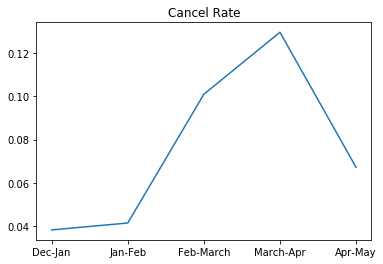

In [41]:
cancel_rate = [cancel_rate_Dec_Jan, cancel_rate_Jan_Feb, cancel_rate_Feb_Mar, cancel_rate_Mar_Apr, cancel_rate_Apr_May]
month = ["Dec-Jan","Jan-Feb", "Feb-March", "March-Apr", "Apr-May"]
plt.plot(month,cancel_rate)
plt.title("Cancel Rate")

Text(0.5, 1.0, 'Number of booked houses')

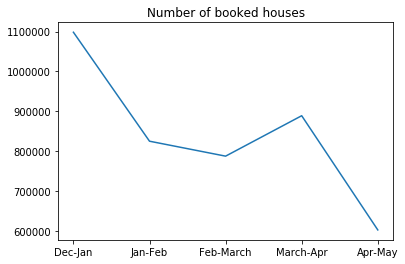

In [43]:
booked_num = [getBookedNum(cal_Dec_booked),getBookedNum(cal_Jan_booked),getBookedNum(cal_Feb_booked),getBookedNum(cal_Mar_booked),getBookedNum(cal_Apr_booked)]
month = ["Dec-Jan","Jan-Feb", "Feb-March", "March-Apr", "Apr-May"]
plt.plot(month, booked_num)
plt.title("Number of booked houses")

Text(0.5, 1.0, 'Number of canceled Houses')

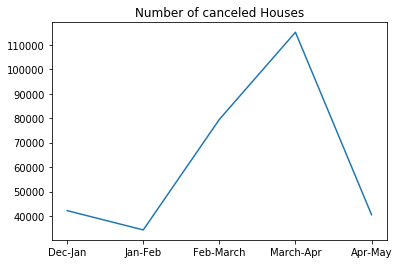

In [44]:
canceled_num = [getCancelNum(combine_Dec_Jan),getCancelNum(combine_Jan_Feb),getCancelNum(combine_Feb_Mar),getCancelNum(combine_Mar_Apr),getCancelNum(combine_Apr_May)]
month = ["Dec-Jan","Jan-Feb", "Feb-March", "March-Apr", "Apr-May"]
plt.plot(month, canceled_num)
plt.title("Number of canceled Houses")